Cryptography

Tagging along with Polylog and ChatGPT

References:

[I can prove I’ve solved this Sudoku without revealing it - Polylog](https://youtu.be/Otvcbw6k4eo?si=0PMUnGsDrkqXEeVc)

Tutor:

OpenAI's ChatGPT

Zero-knowledge proofs (ZKPs) are cryptographic methods that allow one party (the *prover*) to convince another party (the *verifier*) that a statement is true, without revealing any additional information beyond the validity of the statement itself. The key idea is that the verifier learns nothing about the statement except its truth, ensuring privacy and security.

Here’s a high-level summary:

1. **Purpose**: To prove knowledge of a fact without revealing the fact itself. For example, proving that you know a password without actually showing it.
  
2. **Main Components**:
   - **Prover**: The party that has the knowledge and wants to prove it.
   - **Verifier**: The party that checks the validity of the proof.
   - **Challenge and Response**: The prover and verifier engage in an interaction where the prover provides cryptographic evidence that the claim is true, and the verifier checks this evidence.

3. **Properties of ZKPs**:
   - **Completeness**: If the statement is true, an honest prover can convince the verifier.
   - **Soundness**: If the statement is false, a dishonest prover cannot convince the verifier.
   - **Zero-knowledge**: The verifier learns nothing about the statement except that it's true.

4. **Applications**:
   - **Privacy**: Ensures that sensitive information (like passwords or transaction details) is not exposed.
   - **Blockchain**: Used for privacy-preserving features in cryptocurrencies (e.g., zk-SNARKs in Zcash).
   - **Authentication**: Enables authentication without revealing personal data.

ZKPs are a powerful tool for ensuring privacy and security in various cryptographic systems.

<ipython-input-1-2c503174e9d3>:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('tab10', 3), node_size=800, font_size=12, font_weight='bold')


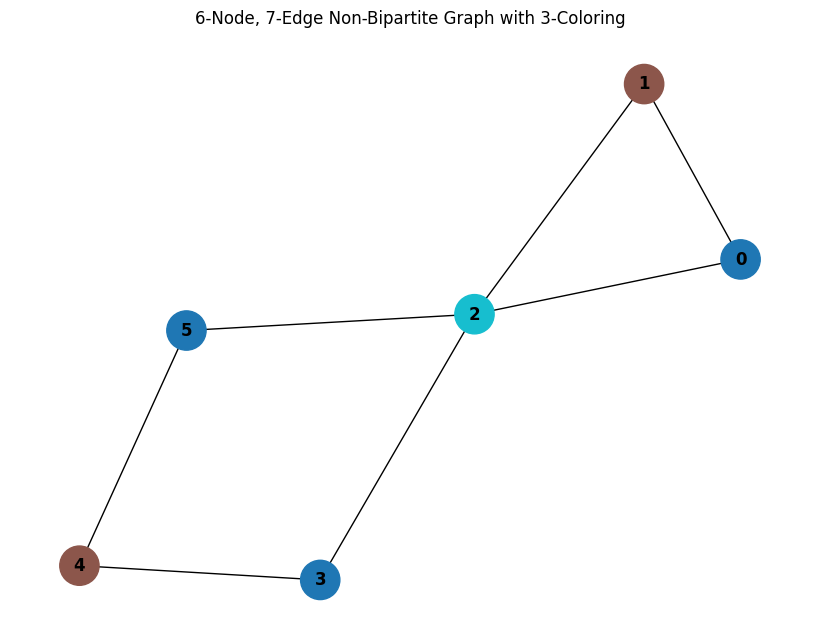

Node color assignment:
Node 0 -> Color 0
Node 1 -> Color 1
Node 2 -> Color 2
Node 3 -> Color 0
Node 4 -> Color 1
Node 5 -> Color 0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Create a graph with 6 nodes and 7 edges
G = nx.Graph()

# Add 6 nodes
G.add_nodes_from(range(6))

# Add 7 edges, creating a non-bipartite graph (which means it must contain an odd-length cycle)
edges = [
    (0, 1), (1, 2), (2, 0),  # triangle (odd cycle)
    (2, 3), (3, 4), (4, 5), (5, 2)  # more edges forming an additional cycle
]
G.add_edges_from(edges)

# Step 2: Color the graph with 3 colors, ensuring no two adjacent nodes share the same color
# We can use a simple greedy coloring algorithm
color_map = {}
for node in G.nodes():
    # Find the colors of the neighbors
    neighbor_colors = {color_map.get(neighbor) for neighbor in G.neighbors(node) if neighbor in color_map}
    # Assign the smallest available color
    for color in range(3):  # We have three colors (0, 1, 2)
        if color not in neighbor_colors:
            color_map[node] = color
            break

# Step 3: Visualize the graph
# Create a list of node colors based on the color_map
node_colors = [color_map[node] for node in G.nodes()]

# Draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, cmap=plt.cm.get_cmap('tab10', 3), node_size=800, font_size=12, font_weight='bold')
plt.title("6-Node, 7-Edge Non-Bipartite Graph with 3-Coloring")
plt.show()

# Output the color assignment for each node
print("Node color assignment:")
for node, color in color_map.items():
    print(f"Node {node} -> Color {color}")
